```
Convert skeleton sequences into images and save them in a folder

We follow this paper for sequence normalization:
Skeleton Based Action Recognition with Convolutional Neural Network
```

#### [link](https://ieeexplore.ieee.org/document/7486569/)


In [7]:
import scipy.io as sio
from math import floor
import numpy as np
import pylab as plt
import cv2
import os

In [8]:
vid_path = 'shuffle107'
mat_path = vid_path + '_mat/'
img_path = vid_path + '_png/'
if not os.path.exists(img_path):
    os.mkdir(img_path)

# Traverse all files
for i in range(1,108):
    file_name = str(i)+'.mat'
    print(file_name)
    mat = sio.loadmat(mat_path + file_name)
    
    # Find the least non-zero value for Cmin
    arr = mat['pred'].reshape(1,-1)
    arr = sorted(arr[0])
    j = 0
    while arr[j] == 0:
        j += 1
    Cmin = arr[j]
    
    Cmax = mat['pred'].max()

    # Normalize the mat
    norMat = np.floor(255*(mat['pred']-Cmin)/(Cmax-Cmin))
    nFrame = norMat.shape[0]
    norMat = norMat.reshape(nFrame,-1)
    img = np.transpose(norMat)
    # Make all image of the same size, 26 rows by 50 columns (frames)
    # Note: in cv2, dsize is (cols,rows)
    img = cv2.resize(img, (50, 26))
    
    cv2.imwrite(img_path+str(i)+'.png',img)

1.mat
2.mat
3.mat
4.mat
5.mat
6.mat
7.mat
8.mat
9.mat
10.mat
11.mat
12.mat
13.mat
14.mat
15.mat
16.mat
17.mat
18.mat
19.mat
20.mat
21.mat
22.mat
23.mat
24.mat
25.mat
26.mat
27.mat
28.mat
29.mat
30.mat
31.mat
32.mat
33.mat
34.mat
35.mat
36.mat
37.mat
38.mat
39.mat
40.mat
41.mat
42.mat
43.mat
44.mat
45.mat
46.mat
47.mat
48.mat
49.mat
50.mat
51.mat
52.mat
53.mat
54.mat
55.mat
56.mat
57.mat
58.mat
59.mat
60.mat
61.mat
62.mat
63.mat
64.mat
65.mat
66.mat
67.mat
68.mat
69.mat
70.mat
71.mat
72.mat
73.mat
74.mat
75.mat
76.mat
77.mat
78.mat
79.mat
80.mat
81.mat
82.mat
83.mat
84.mat
85.mat
86.mat
87.mat
88.mat
89.mat
90.mat
91.mat
92.mat
93.mat
94.mat
95.mat
96.mat
97.mat
98.mat
99.mat
100.mat
101.mat
102.mat
103.mat
104.mat
105.mat
106.mat
107.mat


```
inspect the last image
```

In [9]:
norMat.shape[0]

50

In [10]:
print(Cmax, Cmin)
# normalize the mat
norMat = np.floor(255*(mat['pred']-Cmin)/(Cmax-Cmin))

876.0 102.0


In [11]:
# points (x,y) in frame i
i = 0
norMat[i,:]

array([[ 217.,  170.],
       [ 180.,  136.],
       [ 193.,   79.],
       [ 197.,   80.],
       [ 176.,  136.],
       [ 198.,  187.],
       [ 165.,   34.],
       [ 174.,   47.],
       [ 184.,   17.],
       [ 198.,   18.],
       [ 191.,   51.],
       [ 179.,   27.],
       [ 191.,   17.]])

In [12]:
norMat = norMat.reshape(50,-1)
norMat.shape

(50, 26)

In [13]:
img = np.transpose(norMat)
# make all image of the same size
img = cv2.resize(img, (50, 26))
img.shape

(26, 50)

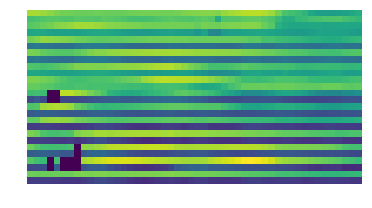

In [14]:
plt.imshow(img)
plt.axis('off')
plt.show()